In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
data=pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [13]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from sklearn.pipeline import Pipeline
X=data.drop('output', axis=1)
Y = data['output']
print(X.shape)
print(Y.shape)

(303, 13)
(303,)


In [15]:
xtrain,xtest,ytrain, ytest= train_test_split(X,Y, test_size=0.2, random_state=0)
pipe=Pipeline([('Constant', DropConstantFeatures(tol=0.998)), ('Duplicate', DropDuplicateFeatures())])
pipe.fit(xtrain)


Pipeline(steps=[('Constant', DropConstantFeatures(tol=0.998)),
                ('Duplicate', DropDuplicateFeatures())])

In [16]:
print("No. of constant features to drop:", len(pipe.named_steps['Constant'].features_to_drop_))
print("No. of duplicate features to drop:", len(pipe.named_steps['Duplicate'].features_to_drop_))

No. of constant features to drop: 0
No. of duplicate features to drop: 0


In [17]:
print(xtrain.shape)
print(xtest.shape)

(242, 13)
(61, 13)


In [18]:
data = data.drop(['oldpeak', 'slp', 'thall'], axis=1)
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1
7,44,1,1,120,263,0,1,173,0,0,1
8,52,1,2,172,199,1,1,162,0,0,1
9,57,1,2,150,168,0,1,174,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'output'])
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.714429,0.914529
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,-0.714429,0.914529
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.714429,0.914529
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.714429,0.914529
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,-0.714429,0.914529


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
LR_model = LogisticRegression(fit_intercept=True)
DT_model=DecisionTreeClassifier(max_depth=5, random_state=1)
RFC_model = RandomForestClassifier(n_estimators = 100) 
KNN_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
SVM_model = svm.SVC()

C:\Users\harih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 0.8524590163934426
Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



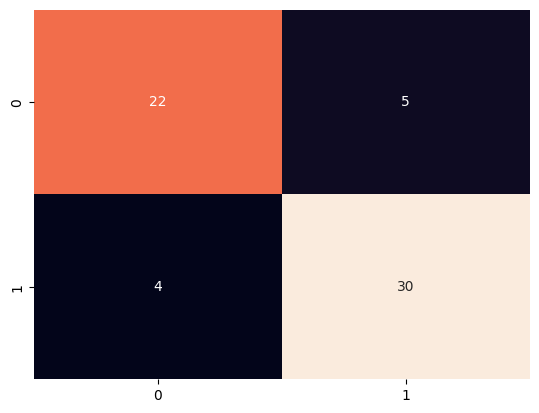

In [22]:
LR_model.fit(xtrain, ytrain)
LR_ypred = LR_model.predict(xtest)
print("Test Accuracy", accuracy_score(ytest, LR_ypred))
print("Test Classification Report\n", classification_report(ytest,LR_ypred))
mat=confusion_matrix(ytest,LR_ypred)
sns.heatmap(mat,annot=True, cbar=False)
plt.show()

Test Accuracy 0.7704918032786885
Test Classification Report
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.81      0.76      0.79        34

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



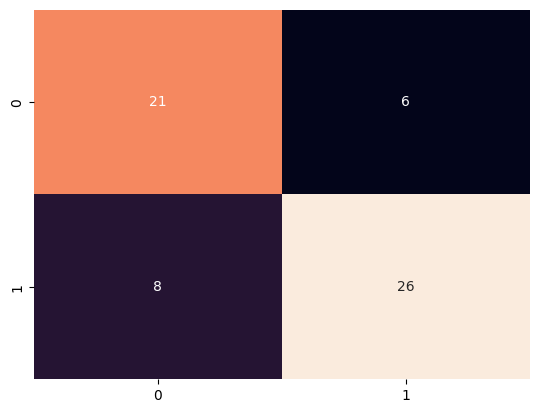

In [25]:
DT_model.fit(xtrain, ytrain)
DT_ypred = DT_model.predict(xtest)
print("Test Accuracy", accuracy_score(ytest, DT_ypred))
print("Test Classification Report\n", classification_report(ytest,DT_ypred))
mat=confusion_matrix(ytest,DT_ypred)
sns.heatmap(mat,annot=True, cbar=False)
plt.show()

Test Accuracy 0.8524590163934426
Test Classification Report
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



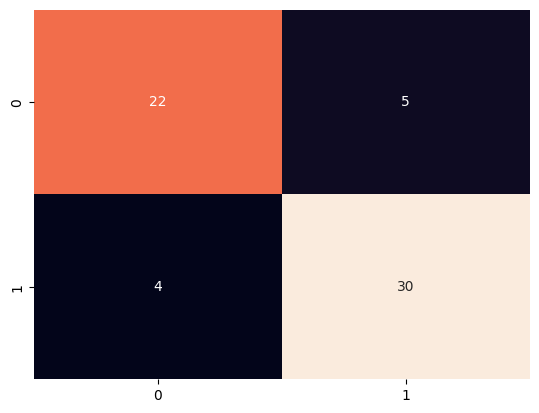

In [26]:
RFC_model.fit(xtrain, ytrain)
RFC_ypred = RFC_model.predict(xtest)
print("Test Accuracy", accuracy_score(ytest, RFC_ypred))
print("Test Classification Report\n", classification_report(ytest,RFC_ypred))
mat=confusion_matrix(ytest,RFC_ypred)
sns.heatmap(mat,annot=True, cbar=False)
plt.show()

Test Accuracy 0.639344262295082
Test Classification Report
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



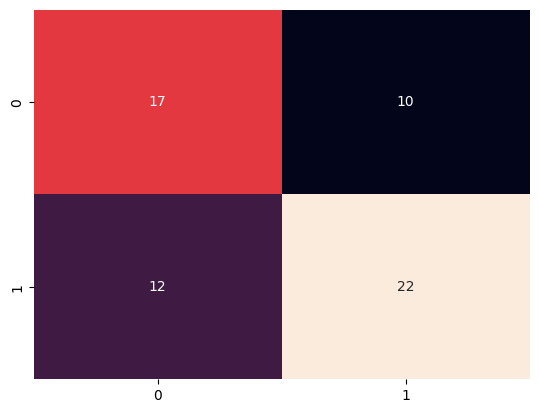

In [27]:
KNN_model.fit(xtrain, ytrain)
KNN_ypred = KNN_model.predict(xtest)
print("Test Accuracy", accuracy_score(ytest, KNN_ypred))
print("Test Classification Report\n", classification_report(ytest,KNN_ypred))
mat=confusion_matrix(ytest,KNN_ypred)
sns.heatmap(mat,annot=True, cbar=False)
plt.show()

Test Accuracy 0.6885245901639344
Test Classification Report
               precision    recall  f1-score   support

           0       0.72      0.48      0.58        27
           1       0.67      0.85      0.75        34

    accuracy                           0.69        61
   macro avg       0.70      0.67      0.67        61
weighted avg       0.70      0.69      0.68        61



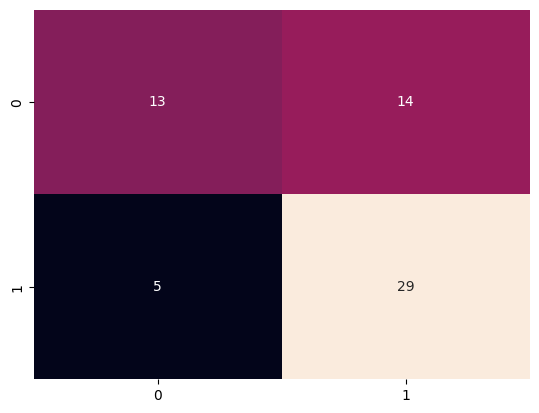

In [28]:
SVM_model.fit(xtrain, ytrain)
SVM_ypred = SVM_model.predict(xtest)
print("Test Accuracy", accuracy_score(ytest, SVM_ypred))
print("Test Classification Report\n", classification_report(ytest,SVM_ypred))
mat=confusion_matrix(ytest,SVM_ypred)
sns.heatmap(mat,annot=True, cbar=False)
plt.show()

Pearson Correlation,


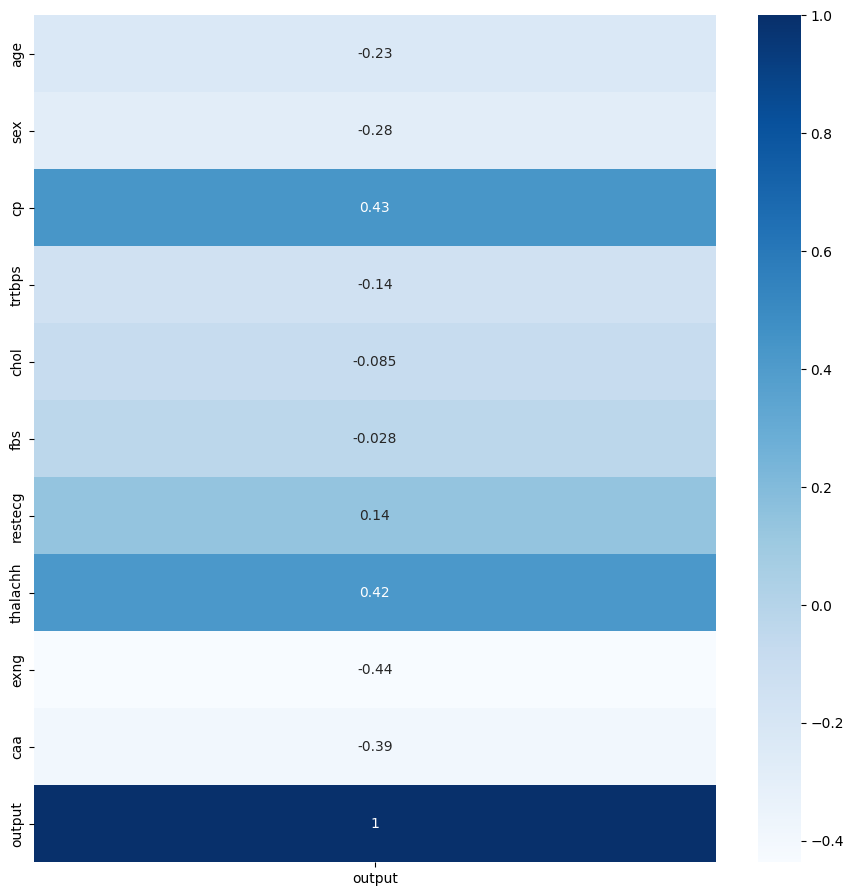

abs corr score: 
age         0.225439
sex         0.280937
cp          0.433798
trtbps      0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalachh    0.421741
exng        0.436757
caa         0.391724
Name: output, dtype: float64


mean 0.25858410591805364


feature selection result: 
sex         0.280937
cp          0.433798
thalachh    0.421741
exng        0.436757
caa         0.391724
Name: output, dtype: float64


In [30]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = data.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['output'][0:-1]))
cor['output'] = cor['output'][0:-1]
margin = abs(cor['output'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['output'][0:-1])[abs(cor['output']) > margin]
print(fs)

In [63]:
data['output'] = data.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
# data['sex'] = data.sex.map({0: 'female', 1: 'male'})
data['thalachh'] = data.thal.fillna(data.thal.mean())
data['caa'] = data.ca.fillna(data.ca.mean())

In [74]:
df = data.copy()
ot = {0: "Less chance of HA",1:'More chance of HA'}
df.output = [ot[item] for item in df.output]

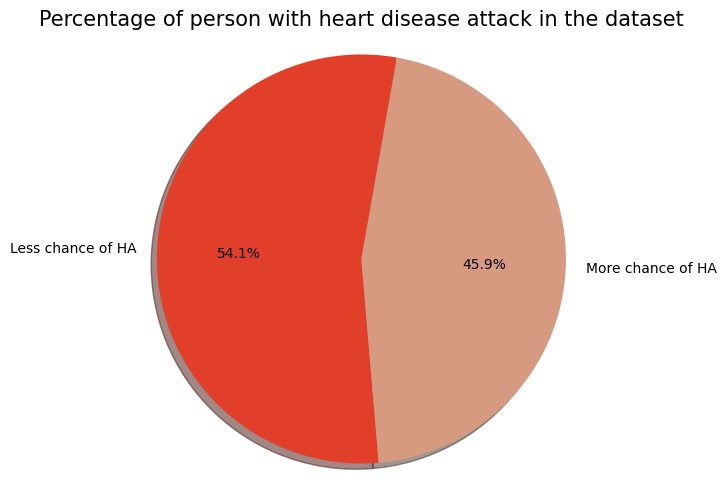

In [75]:
heart=Counter(df['output'])
classes=[]
count=[]   #list to store no of laels of each class
for i in heart.keys():
    classes.append(i)
    count.append(heart[i])
colors = ["#E13F29", "#D69A80"]

plt.pie(
    count,
    labels = classes,
    shadow = True,
    colors = colors,
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of person with heart disease attack in the dataset", fontsize=15)
plt.show()
# fig = px.pie(df, names='output', title='Percentage of person with heart disease present in the dataset')
# fig.show()

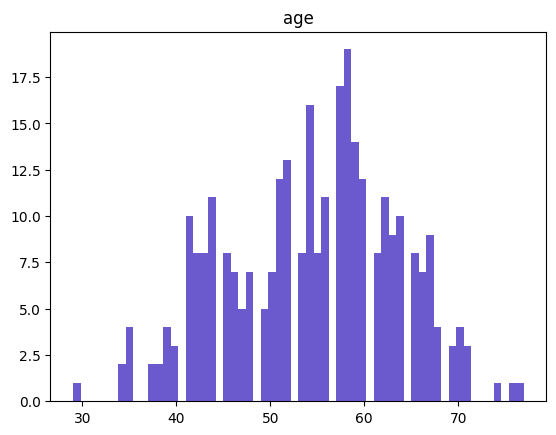

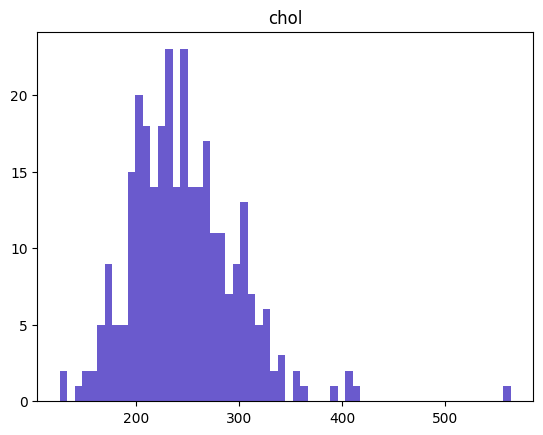

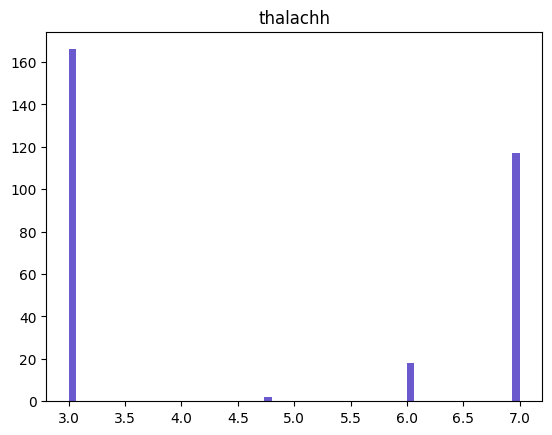

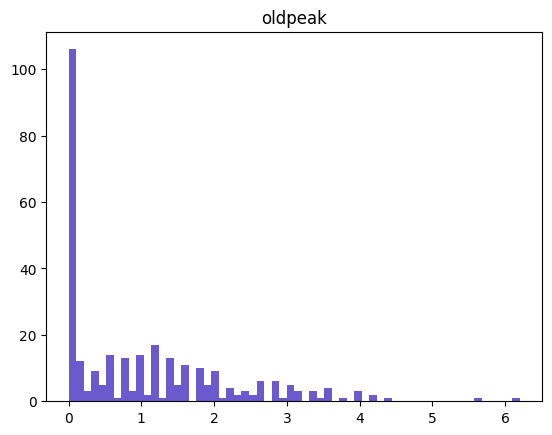

In [79]:
i = ['age', 'chol','thalachh','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()